In [28]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #for ease
from sklearn.feature_extraction.text import TfidfVectorizer #to extract features from text
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
dataSet = pd.read_csv('C:\\Users\MAVERICK\Downloads\spam.csv',encoding='latin1') #if gives error it means it has null values

#so replace null values with string
dataSet1 = dataSet.where((pd.notnull(dataSet)),'')

dataSet1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [3]:
dataSet2 = dataSet1.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
print(dataSet2.head())
dataSet2.shape

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


(5572, 2)

In [4]:
#rename features
dataSet2 = dataSet2.rename(columns = {'v1':'Category','v2':'Message'})
dataSet2.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#labeling Spam/Ham
dataSet2.loc[dataSet2['Category']=='spam', 'Category',] = 0
dataSet2.loc[dataSet2['Category']=='ham', 'Category',] = 1

#now labling these 2 columns as X and Y
X = dataSet2['Message']
Y = dataSet2['Category']
print(X,Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object 0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [11]:
#spliting data into test and train
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, train_size=0.8, test_size =0.2,random_state = 3)


In [17]:
#now features Extraction
#transforming text data to feature vectors to be input of KNN
#first always convert text dat in lower case
featureExtraction = TfidfVectorizer(min_df =1, stop_words = 'english', lowercase='True')

#storing train and test subjects in this function
#Convert to float
X_trainFeatures = featureExtraction.fit_transform(X_train)
X_testFeatures = featureExtraction.transform(X_test)

#now converting Y into int to work on

Y_train =Y_train.astype('int')
Y_test =Y_test.astype('int')

In [20]:
#using KNN
#finally training the model using the features variable
knn = KNeighborsClassifier(n_neighbors=1)#selecting number of k using error rate and k value graph
knn.fit(X_trainFeatures,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
pred = knn.predict(X_testFeatures)

In [24]:
#prediction and evaluation

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(Y_test,pred))

[[ 97  58]
 [  0 960]]


In [25]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77       155
           1       0.94      1.00      0.97       960

    accuracy                           0.95      1115
   macro avg       0.97      0.81      0.87      1115
weighted avg       0.95      0.95      0.94      1115



In [45]:
# elbow method to pick K value
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainFeatures,Y_train)
    pred_i = knn.predict(X_testFeatures)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

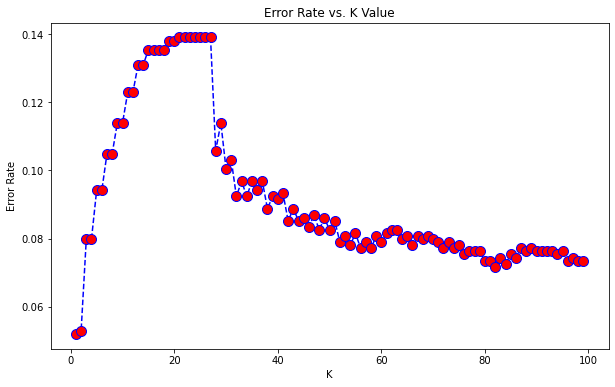

In [47]:
#plotting error and k value graph

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:

# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_trainFeatures,Y_train)
pred = knn.predict(X_testFeatures)

print("WITH K=1")
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))


WITH K=1


[[ 97  58]
 [  0 960]]


              precision    recall  f1-score   support

           0       1.00      0.63      0.77       155
           1       0.94      1.00      0.97       960

    accuracy                           0.95      1115
   macro avg       0.97      0.81      0.87      1115
weighted avg       0.95      0.95      0.94      1115



In [49]:
#Here we can see that that after arouns K>82 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report
# NOW WITH K=32
knn = KNeighborsClassifier(n_neighbors=82)

knn.fit(X_trainFeatures,Y_train)
pred = knn.predict(X_testFeatures)

print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

[[ 76  79]
 [  1 959]]


              precision    recall  f1-score   support

           0       0.99      0.49      0.66       155
           1       0.92      1.00      0.96       960

    accuracy                           0.93      1115
   macro avg       0.96      0.74      0.81      1115
weighted avg       0.93      0.93      0.92      1115



In [50]:
#now check how well the model perform
#first just check on already trained daata i.e. prediction on training data
predictionTrainingdata = knn.predict(X_trainFeatures)
ourAccuracy = accuracy_score(Y_train, predictionTrainingdata)
print(ourAccuracy)

0.9315683194974198


In [51]:
#fun part check model by putting a random mail to test
yourMail = ["Dear Abdul Wajid, Thank you for being a part of the DeepLearning.AI community.In 2020, we expanded our curriculum by adding programs that focussed on conceptual foundations of AI in Natural Language Processing and applications of AI in the medical industry, in the area of Generative Adversarial Networks, and with the TensorFlow framework. Take a look"]

#first convert it to features vertors
yourMailFeatures = featureExtraction.transform(yourMail)
#than feed to model
predictionYourmail = knn.predict(yourMailFeatures)

if (predictionYourmail[0] == 0):
    print("Its a spam mail")
else:
    print("Its a ham mail")

Its a ham mail
